<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# # Project 3 : Web API and NLP

## Part 1: Import and Read csv file

** Overview: **

1. Read csv with all reddit nlp clean content saved
2. Define X and y
3. Create TfidfVectorizer and model
4. Create SVC model

In [28]:
#imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
#read the csv
reddit_df = pd.read_csv("datasets/redditready.csv")
# reddit_df.drop(columns = 'Unnamed: 0', inplace=True)
reddit_df.head()

,subreddit,submission_text
0,boardgames,Hi all really want to get into board games tha...
1,boardgames,My husband and I are looking for fun 2 player ...
2,boardgames,do Apocalypse 5E Kickstarter
3,boardgames,Ive been looking into the counter insurgency C...
4,boardgames,removedMaking Space For Disappointment


## Part 2: 

In [7]:
#define x and y
X = reddit_df['submission_text']
y = reddit_df['subreddit']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.25,
                                                 stratify=y,
                                                 random_state=42)
cvec = CountVectorizer(stop_words='english', 
                       ngram_range=(2,2),
                       min_df=2
                      )

cvec.fit(X)
trans_x = cvec.transform(X)
cvec_df = pd.DataFrame(trans_x.todense(), columns = cvec.get_feature_names())

In [8]:
cvec_df.sum().sort_values(ascending=False).head(15)

new vegas        280
board game       279
board games      165
rocket league    155
dont know        114
fallout game     106
feel like        105
fallout new       92
fallout 76        85
im sure           76
ive played        66
base game         60
card game         60
im looking        59
power armor       58
dtype: int64

In [9]:
cvec.fit(X_train)
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [10]:
cvec.best_score_

AttributeError: 'CountVectorizer' object has no attribute 'best_score_'

In [11]:
y_test.value_counts()

Fallout         400
RocketLeague    375
boardgames      350
Name: subreddit, dtype: int64

In [13]:
# pred_reddit1 = cvec.predict(X)

### Part 3:

In [15]:
#define x and y
X = reddit_df['submission_text']
y = reddit_df['subreddit']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.25,
                                                 stratify=y,
                                                 random_state=42)

In [16]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_tvec_params = {
    'tvec__max_features':[2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words':[None, 'english'],
    'tvec__ngram_range':[(1,1), (1,2)]
}

In [20]:
gs_tvec = GridSearchCV(pipe, param_grid = pipe_tvec_params, 
         cv=5)

In [21]:
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [23]:
gs_tvec.score(X_train, y_train)


0.9475555555555556

In [24]:
gs_tvec.score(X_test, y_test)

0.9031111111111111

In [26]:
gs_tvec.best_params_

{'tvec__max_features': 3000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': None}

In [29]:
# Get predictions
preds_tvec=gs_tvec.predict(X_test)

# Save confusion matrix values
cm = confusion_matrix(y_test, preds_tvec)


In [30]:
tn, fp, fn, tp = cm.ravel()
# Calculate the specificity
spec = tn/(tn+fp)#fp = 0 spam pred 0 as fp, fn =34
spec

ValueError: too many values to unpack (expected 4)

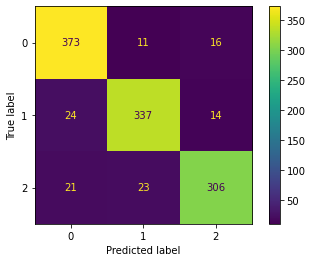

In [31]:
ConfusionMatrixDisplay(cm).plot();